In [8]:
import numpy as np

class Universe:
    def __init__(self, character_type):
        self.character_type = character_type
        self.black_holes = self.form_black_holes()

    def form_black_holes(self, character_type=None):
        if character_type is None:
            character_type = self.character_type
        return int(np.sum(np.tanh(character_type)))  # Using a tanh function to simulate diminishing returns

    def produce_daughter_universe(self):
        # The daughter universe inherits the character type with some variation
        mutation_strength = np.random.normal(0, 0.1, len(self.character_type))
        new_character_type = self.character_type + mutation_strength
        return Universe(new_character_type)

class Multiverse:
    def __init__(self, initial_universes):
        self.generations = [[Universe(np.random.normal(0, 1, 10)) for _ in range(initial_universes)]]

    def truncation_selection(self, current_generation, truncation_ratio=0.5):
        # Sort the current generation by fitness (number of black holes)
        sorted_generation = sorted(current_generation, key=lambda u: u.black_holes, reverse=True)
        
        # Select the top percentage of universes
        num_selected = int(len(sorted_generation) * truncation_ratio)
        return sorted_generation[:num_selected]
    
    def top_selection(self, current_generation, top_number=5):
        # Sort the current generation by fitness (number of black holes)
        sorted_generation = sorted(current_generation, key=lambda u: u.black_holes, reverse=True)
        
        # Select the top number of universes
        return sorted_generation[:top_number]

    def next_generation(self):
        new_generation = []
        current_generation = self.generations[-1]
        
        # Perform truncation selection to choose universes for reproduction
        selected_universes = self.top_selection(current_generation)

        for universe in selected_universes:
            # Each selected universe can produce offspring proportional to its black holes
            for _ in range(universe.black_holes):
                new_generation.append(universe.produce_daughter_universe())

        self.generations.append(new_generation)

mv = Multiverse(10)

print(len(mv.generations[-1]))
for _ in range(1000):
    mv.next_generation()
print(len(mv.generations[-1]))

10
45


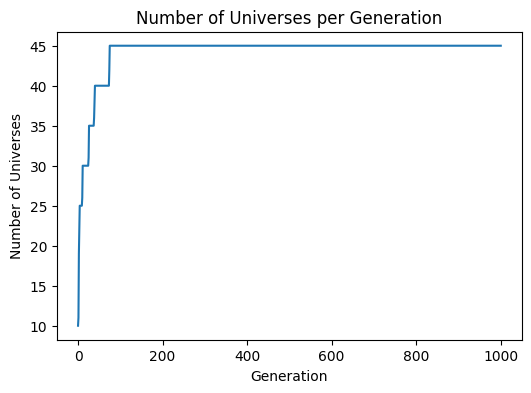

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
generation_counts = [len(generation) for generation in mv.generations]
plt.plot(generation_counts)
plt.xlabel('Generation')
plt.ylabel('Number of Universes')
plt.title('Number of Universes per Generation')
plt.show()


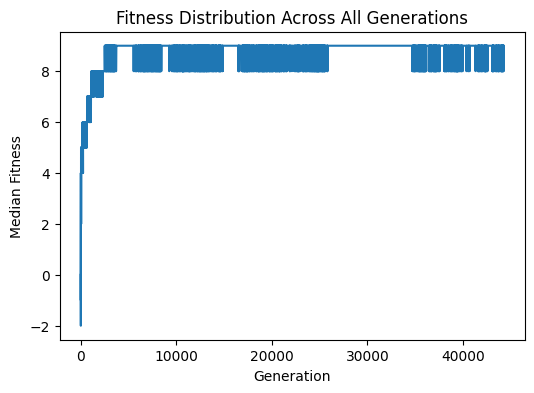

In [10]:
# Assuming 'current_generation' is available and has attribute 'black_holes' for fitness
all_fitness_values = []

for current_generation in mv.generations:
    fitness_values = [universe.black_holes for universe in current_generation]
    all_fitness_values.extend(fitness_values)

plt.figure(figsize=(6,4))
plt.plot(all_fitness_values)
plt.xlabel('Generation')
plt.ylabel('Median Fitness')
plt.title('Median Fitness Across All Generations')
plt.show()
